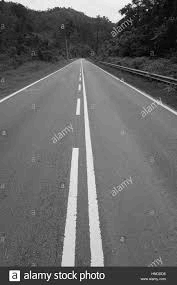

In [6]:
pkg load image
image=imread('/home/lenovo/Downloads/road.jpeg');
img=rgb2gray(image);
imshow(img)


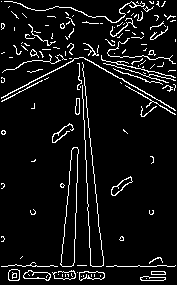

In [7]:
edges=edge(img,'canny');
imshow(edges)

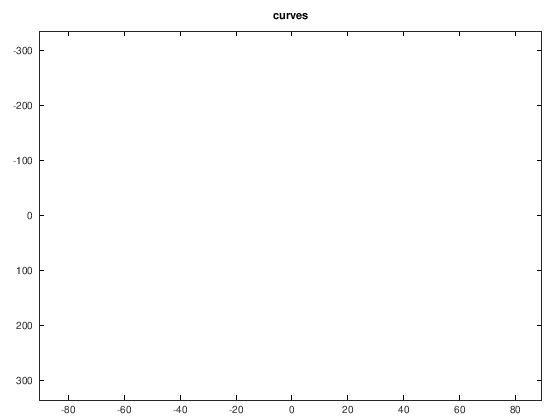

In [26]:
[accm,theta,rho]=hough(edges);

figure;imagesc(accm,'XData',theta,'Ydata',rho),title('curves');

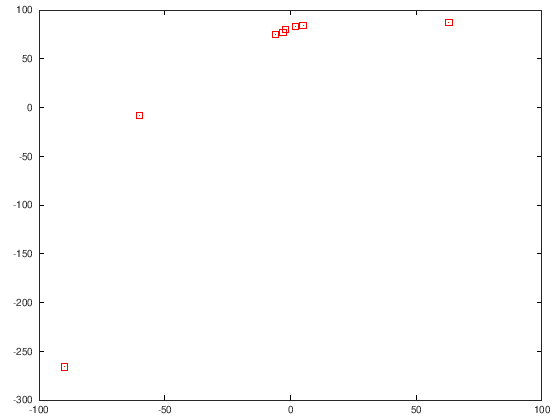

In [42]:
peaks=houghpeaks(accm,100,'Threshold',ceil(0.5*max(accm(:))),'NHoodsize',[5,5]);



plot(theta(peaks(:,2)),rho(peaks(:,1)),'rhs')

In [49]:
line_seg=houghlines(edges,theta,rho,peaks,'FillGap',30,'MinLength',50)

line_seg =

  1x7 struct array containing the fields:

    point1
    point2
    theta
    rho



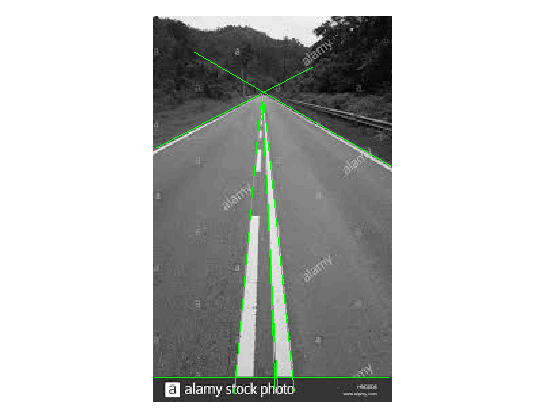

In [50]:
figure; imshow(img)
hold on;
for k=1:length(line_seg)
    endpoints=[line_seg(k).point1;line_seg(k).point2];
    plot(endpoints(:,1),endpoints(:,2),'linewidth',2,'color','green')
end
hold off;